In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper")
sns.set_style('ticks')

Observed and predicted $\beta$ drift components for SH tropical cyclones.

In [2]:
df = pd.read_csv(r"X:\georisk\HaRIA_B_Wind\projects\tcha\data\derived\envflow\SH\beta.components.SH.pred.n20.csv",)

In [3]:
df.describe()

,X,u,v,up,vp,ub,vb,dzdy,dudy,dvdx,su,sv,lon,lat,cosphi,ubpred,vbpred
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,702.186301,-0.443979,-2.013755,0.159402,-1.939182,-0.603381,-0.074573,-3.254280,-0.013025,-0.181758,-3.504215,1.151470,108.476027,-17.907534,-0.000499,-0.603381,-0.074573
std,187.987866,1.793941,1.147434,1.533407,1.352620,0.706376,0.558805,4.528116,3.043995,0.799286,6.307740,1.752719,44.732803,5.692966,0.670195,0.364243,0.328003
min,171.000000,-4.251677,-6.944957,-2.785676,-6.116990,-2.841012,-1.526297,-12.844069,-7.789219,-3.726012,-18.741397,-3.121599,41.250000,-33.750000,-0.888988,-1.604231,-0.974809
25%,576.000000,-1.845192,-2.657019,-1.054961,-2.911584,-0.997389,-0.492023,-6.172803,-2.297631,-0.480543,-8.607075,0.086974,68.750000,-21.250000,-0.737694,-0.855965,-0.288269
50%,734.000000,-0.530659,-1.659225,0.016518,-1.642308,-0.569100,-0.050229,-3.161975,-0.250963,-0.051325,-2.012444,1.015600,103.750000,-16.250000,0.251690,-0.616146,-0.081930
75%,849.000000,0.802474,-1.184062,1.214337,-0.873410,-0.173930,0.323281,-0.532217,2.721033,0.291612,1.862324,2.003666,153.750000,-13.750000,0.377567,-0.382430,0.146085
max,1074.000000,4.135643,0.568016,4.467927,0.374699,1.471509,2.058287,9.409744,6.256351,2.383419,7.834317,9.214787,188.750000,-6.250000,0.999449,0.660631,0.777143


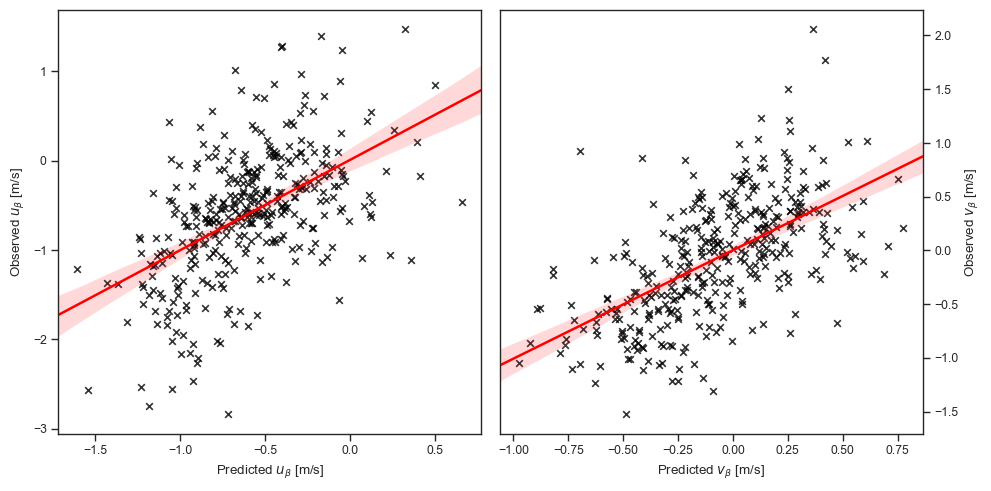

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.regplot(df, x='ubpred', y='ub', ax=ax[0], truncate=False, marker='x', color='k', line_kws={'color':'r'})
sns.regplot(df, x='vbpred', y='vb', ax=ax[1], truncate=False, marker='x', color='k', line_kws={'color':'r'})

#ax[0].set_xlim((-7.5, 7.5))
#ax[1].set_xlim((-7.5, 0))

ax[0].set_ylabel(r"Observed $u_{\beta}$ [m/s]")
ax[0].set_xlabel(r"Predicted $u_{\beta}$ [m/s]")
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')
ax[1].set_ylabel(r"Observed $v_{\beta}$ [m/s]")
ax[1].set_xlabel(r"Predicted $v_{\beta}$ [m/s]")

fig.tight_layout()

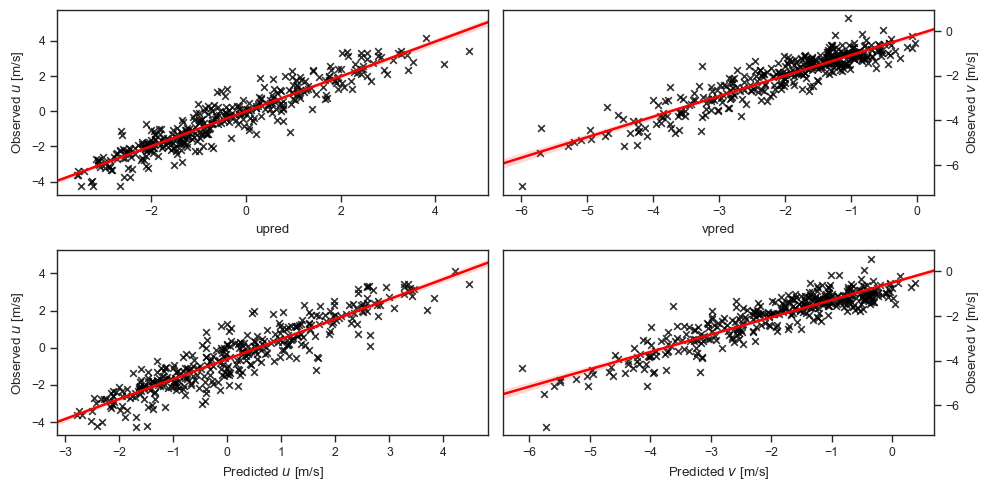

In [5]:
df['upred'] = df['up'] + df['ubpred']
df['vpred'] = df['vp'] + df['vbpred']
fig, ax = plt.subplots(2, 2, figsize=(10, 5))

sns.regplot(df, x='upred', y='u', ax=ax[0, 0], truncate=False, marker='x', color='k', line_kws={'color':'r'})
sns.regplot(df, x='vpred', y='v', ax=ax[0, 1], truncate=False, marker='x', color='k', line_kws={'color':'r'})


sns.regplot(df, x='up', y='u', ax=ax[1, 0], truncate=False, marker='x', color='k', line_kws={'color':'r'})
sns.regplot(df, x='vp', y='v', ax=ax[1, 1], truncate=False, marker='x', color='k', line_kws={'color':'r'})
#ax[0].set_xlim((-7.5, 7.5))
#ax[1].set_xlim((-7.5, 0))

ax[0, 0].set_ylabel(r"Observed $u$ [m/s]")
ax[1, 0].set_ylabel(r"Observed $u$ [m/s]")

ax[1, 0].set_xlabel(r"Predicted $u$ [m/s]")
ax[0, 1].yaxis.tick_right()
ax[1, 1].yaxis.tick_right()

ax[0, 1].yaxis.set_label_position('right')
ax[1, 1].yaxis.set_label_position('right')

ax[0, 1].set_ylabel(r"Observed $v$ [m/s]")
ax[1, 1].set_ylabel(r"Observed $v$ [m/s]")

ax[1, 1].set_xlabel(r"Predicted $v$ [m/s]")

fig.tight_layout()

In [6]:
df[['u', 'v', 'up', 'vp', 'upred', 'vpred']].corr()

,u,v,up,vp,upred,vpred
u,1.000000,-0.552949,0.921644,-0.589463,0.941885,-0.599267
v,-0.552949,1.000000,-0.471576,0.912966,-0.541982,0.923373
up,0.921644,-0.471576,1.000000,-0.507449,0.980748,-0.525442
vp,-0.589463,0.912966,-0.507449,1.000000,-0.582704,0.978297
upred,0.941885,-0.541982,0.980748,-0.582704,1.000000,-0.586823
vpred,-0.599267,0.923373,-0.525442,0.978297,-0.586823,1.000000


In [ ]:
df = pd.read_csv(r"X:\georisk\HaRIA_B_Wind\projects\tcha\data\derived\envflow\WP\beta.components.WP.pred.n40.csv",)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.regplot(df, x='ubpred', y='ub', ax=ax[0], truncate=False, marker='x', color='k', line_kws={'color':'r'})
sns.regplot(df, x='vbpred', y='vb', ax=ax[1], truncate=False, marker='x', color='k', line_kws={'color':'r'})

#ax[0].set_xlim((-7.5, 7.5))
#ax[1].set_xlim((-7.5, 0))

ax[0].set_ylabel(r"Observed $u_{\beta}$ [m/s]")
ax[0].set_xlabel(r"Predicted $u_{\beta}$ [m/s]")
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')
ax[1].set_ylabel(r"Observed $v_{\beta}$ [m/s]")
ax[1].set_xlabel(r"Predicted $v_{\beta}$ [m/s]")

fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.regplot(df, x='lat', y='vb', ax=ax[0], truncate=False, marker='x', color='k', order=2, line_kws={'color':'r'})
sns.regplot(df, x='lat', y='su', ax=ax[1], truncate=False, marker='x', color='k', line_kws={'color':'r'})

#ax[0].set_xlim((-7.5, 7.5))
#ax[1].set_xlim((-7.5, 0))

ax[0].set_ylabel(r"Observed $v_{\beta}$ [m/s]")
ax[0].set_xlabel(r"Latitude $^\circ$S")
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')
ax[1].set_ylabel(r"Vertical wind shear")
ax[1].set_xlabel(r"Latitude $^\circ$S")

fig.tight_layout()

In [ ]:
df.describe()